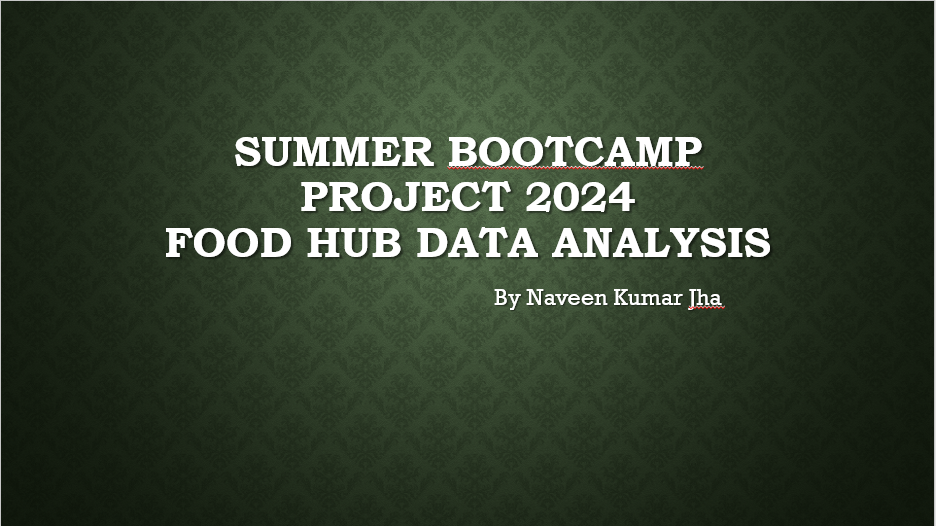

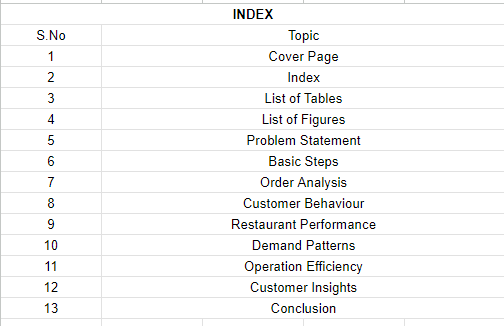

## List of Tables
* 1.Showing the top 5 rows
* 2.Showing the bottom 5 rows
* 3.Showing the statistical summary
* 4.Showing the average preparation time for each restaurant
* 5.SHowing the average delivery time for each restaurant

## List of figures
* 1.1 Boxplot showing distribution of data in cost_of_the_order column
* 1.2 Boxplot showing distribution of data in food_preparation_time column
* 2.1 Graph showing average ratings on weekdays v weekends
* 2.2 Graph showing count of orders on weekdays v weekends
* 4.1 Countplot showing variation for demands for diifrent cuisine type on weekdays v weekends
* 4.2 Graph showing average ratings for diffrent cuisine
* 5.1 Graph showing relationship between delivery time and food preparation time
* 6.1 Countplot showing repeated order by customer id
* 6.2 Graph showing count of ratings given to orders

## Problem Statement
#### The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business

Data Description

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('D:\\Naveen\\2-foodhub_order_New.csv')

In [3]:
data


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31


### Basic Steps

#### 1.Display the top 5 rows

In [158]:
print('Table 1: Showing the top 5 rows')
data.head().T

Table 1: Showing the top 5 rows


,0,1,2,3,4
order_id,1477147,1477685,1477070,1477334,1478249
customer_id,337525,358141,66393,106968,76942
restaurant_name,Hangawi,Blue Ribbon Sushi Izakaya,Cafe Habana,Blue Ribbon Fried Chicken,Dirty Bird to Go
cuisine_type,Korean,Japanese,Mexican,American,American
cost_of_the_order,30.75,12.08,12.23,29.2,11.59
day_of_the_week,Weekend,Weekend,Weekday,Weekend,Weekday
rating,Not given,Not given,5,3,4
food_preparation_time,25.0,25.0,23.0,25.0,25.0
delivery_time,20.0,25.0,28.0,15.0,24.0


#### 2.Display the last 5 rows

In [159]:
print('Table 2: Showing the bottom 5 rows')
data.tail().T

Table 2: Showing the bottom 5 rows


,1893,1894,1895,1896,1897
order_id,1476701,1477421,1477819,1477513,1478056
customer_id,292602,397537,35309,64151,120353
restaurant_name,Chipotle Mexican Grill $1.99 Delivery,The Smile,Blue Ribbon Sushi,Jack's Wife Freda,Blue Ribbon Sushi
cuisine_type,Mexican,American,Japanese,Mediterranean,Japanese
cost_of_the_order,22.31,12.18,25.22,12.18,19.45
day_of_the_week,Weekend,Weekend,Weekday,Weekday,Weekend
rating,5,5,Not given,5,Not given
food_preparation_time,31.0,31.0,31.0,23.0,28.0
delivery_time,17.0,19.0,24.0,31.0,24.0


#### 3.	Check the shape of dataset

In [6]:
data.shape

(1898, 9)

#### 4.Check the datatypes of each features

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


### Observations
* Datatype of delivery_time should be numerical but it is object instead. Hence, it needs to be checked

#### 5.Check the statstical summary

In [160]:
print('Table 3: Showing the statistical summary')
data.describe()

Table 3: Showing the statistical summary


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,17.439145,27.371444,24.163330
std,5.480497e+02,113698.139743,41.823984,4.631783,4.972638
min,1.476547e+06,1311.000000,0.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000,28.000000
max,1.478444e+06,405334.000000,1809.126912,35.000000,33.000000


#### 6.Check the null values

In [9]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

#### 7.Check the duplicate values 

In [10]:
data.duplicated().sum()

0

#### Observations
* There are no duplicate values

#### 8.Check the anomolies or wrong entries

In [11]:
data['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [12]:
data['cuisine_type'].value_counts()

cuisine_type
American          582
Japanese          470
Italian           298
Chinese           215
Mexican            76
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [13]:
data['cost_of_the_order'].value_counts()

cost_of_the_order
12.18    86
12.13    81
12.23    47
24.20    42
29.10    37
         ..
6.26      1
9.61      1
4.47      1
15.04     1
29.59     1
Name: count, Length: 314, dtype: int64

In [14]:
data['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [15]:
data['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [157]:
data['food_preparation_time'].value_counts()

food_preparation_time
21.0    135
27.0    125
23.0    123
22.0    123
28.0    121
24.0    121
20.0    119
33.0    118
30.0    118
35.0    117
31.0    116
26.0    115
34.0    113
32.0    113
25.0    112
29.0    109
Name: count, dtype: int64

In [17]:
data['delivery_time'].value_counts()

delivery_time
24    161
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     76
32     59
33     49
31     41
?       2
Name: count, dtype: int64

#### 9.Check the outliers and their authenticity

<Axes: title={'center': '1.1 Boxplot showing distrbution of data in cost_of_the_order column'}, xlabel='cost_of_the_order'>

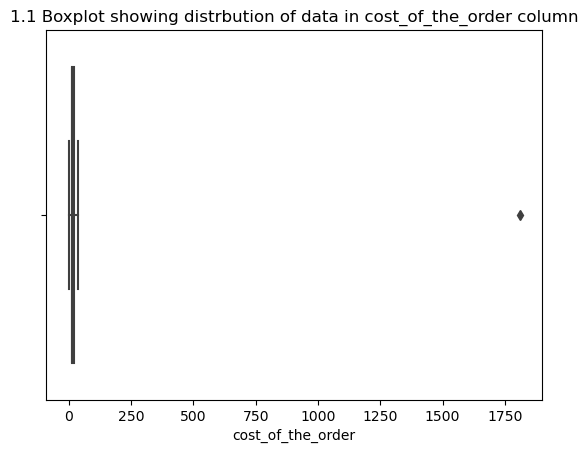

In [146]:
plt.title('1.1 Boxplot showing distrbution of data in cost_of_the_order column')
sns.boxplot(data=data,x='cost_of_the_order')

#### Observations
* There is one outlier in the 'cost_of_the_order' column which is order_id 214 with the value of 12192.0

<Axes: title={'center': '1.2 Boxplot showing data distribution in food_preparation_time column'}, xlabel='food_preparation_time'>

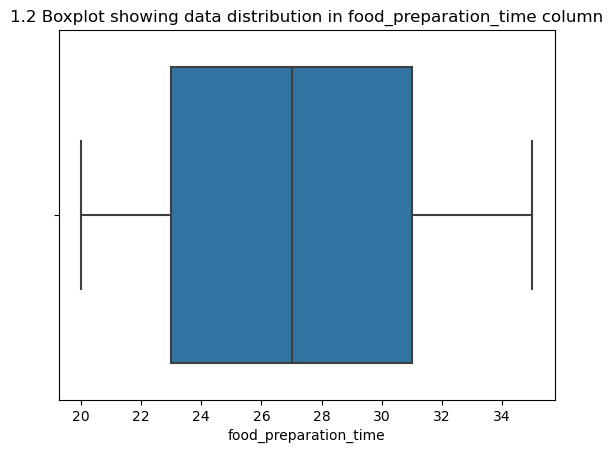

In [147]:
plt.title('1.2 Boxplot showing data distribution in food_preparation_time column')
sns.boxplot(data=data,x='food_preparation_time')

#### Observations
* There is no outlier in 'food_preparation_time' column

#### 10.Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [20]:
data['delivery_time']=data['delivery_time'].replace('?',np.nan)


##### All values in column delivery time which was '?' replaced with null value

In [21]:
data['food_preparation_time'].replace(np.nan,data['food_preparation_time'].median(),inplace=True)

In [22]:
data['delivery_time'].replace(np.nan,data['delivery_time'].median(),inplace=True)

In [23]:
data['delivery_time'].value_counts()

delivery_time
24      161
28      148
29      148
26      141
27      138
30      133
25      120
19       90
16       90
20       88
15       87
22       85
18       83
21       81
17       78
23       76
32       59
33       49
31       41
25.0      2
Name: count, dtype: int64

In [24]:
df1=data[data['restaurant_name']=='Parm']
m1=df1['cost_of_the_order'].mean()
data['cost_of_the_order']=data['cost_of_the_order'].replace(121920.0,m1)

#### Note:- The outlier in cost_of_the_order column has been replaced with mean of the cost_of_the_order column where the restaurant name is same as the outlier's one 

### 1.Order Analysis
* What is the total number of orders in the dataset?
* What is the average cost of an order?
* How many unique customers have placed orders?
* Which restaurant has received the highest number of orders?

In [25]:
print("There are",data['order_id'].count(),"orders in the dataset")

There are 1898 orders in the dataset


In [26]:
print("The average cost of an order is",data['cost_of_the_order'].mean())

The average cost of an order is 17.439144842868654


In [27]:
print(len(data['customer_id'].unique()),"unique customers have placed orders")

1200 unique customers have placed orders


In [28]:
print("Restuarant",data['restaurant_name'].value_counts().idxmax(),"has the highest number of orders with",data['restaurant_name'].value_counts().max())

Restuarant Shake Shack has the highest number of orders with 219


#### Answers of Order Analysis
* There are 1898 orders in the dataset
* The average cost of an order is 17.439144842868654
* 1200 unique customers have placed orders
* Restuarant Shake Shack has the highest number of orders with 219


#### 2.Customer Behaviour
* What is the average rating given by customers?
* How does the rating vary between weekdays and weekends?
* Which cuisine type is ordered the most?
* What is the distribution of orders across different days of the week?

In [29]:
df3=data[data['rating']!='Not given']

In [30]:
df3['rating']=df3['rating'].astype(int)
print("The average rating given by consumers is",df3['rating'].mean())

The average rating given by consumers is 4.344234079173838


C:\Users\VIVEK\AppData\Local\Temp\ipykernel_16856\3824723398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rating']=df3['rating'].astype(int)


<Axes: title={'center': '2.1 Graph showing average rating on weekdays v weekends'}>

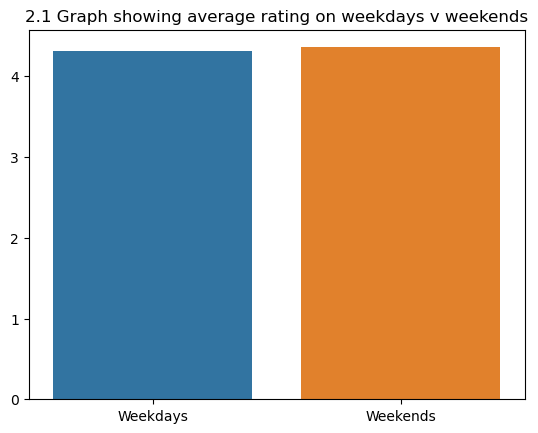

In [148]:
a=np.array([df4['rating'].mean(),df5['rating'].mean()])
plt.title('2.1 Graph showing average rating on weekdays v weekends')
sns.barplot(y=a,x=ast)

#### Observations
* The average rating on weekday is 4.3088235294117645 while the average rating on weekend is  4.358880778588808

In [33]:
print("The cuisine type ordered the most is",data['cuisine_type'].value_counts().idxmax(),"with",data['cuisine_type'].value_counts().max(),'Orders')

The cuisine type ordered the most is American with 582 Orders


<Axes: title={'center': '2.2 Graph showing count of orders on weekdays v weekends'}>

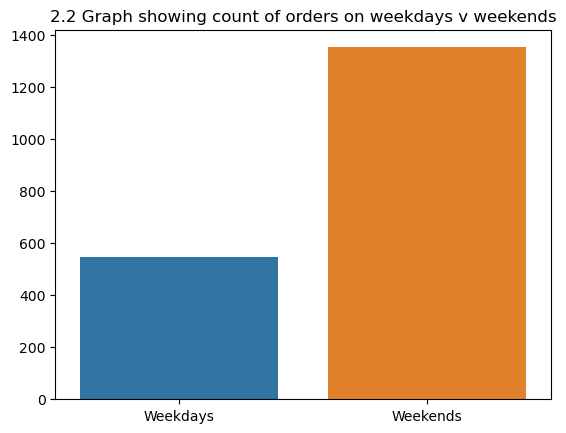

In [150]:
at=np.array([df6['order_id'].count(),df7['order_id'].count()])
ast=np.array(['Weekdays','Weekends'])
plt.title('2.2 Graph showing count of orders on weekdays v weekends')
sns.barplot(x=ast,y=at)

#### Observations
* The distribution of orders on weekdays is to weekend is 547 to 1351


#### Answers of Customer behaviour
* The average rating given by consumers is 4.344234079173838
* The average rating on weekday is 4.3088235294117645 while the average rating on weekend is  4.358880778588808
* The cuisine type ordered the most is American with 582 Orders
* The distribution of orders on weekdays is to weekend is 547 to 1351

#### 3.Restaurant performance
* What is the average food preparation time for each restaurant?
* Which restaurant has the shortest average food preparation time?
* How does the average delivery time compare across different restaurants?
* Is there a correlation between the cost of the order and the rating given?

In [163]:
print("Table 4:Showing the average food preparation time for each restaurant")
print("Top 5\n",pd.DataFrame(data.groupby('restaurant_name')['food_preparation_time'].mean().head()))
print("Bottom 5\n",pd.DataFrame(data.groupby('restaurant_name')['food_preparation_time'].mean().tail()))

Table 4:Showing the average food preparation time for each restaurant
Top 5
                  food_preparation_time
restaurant_name                       
'wichcraft                        28.0
12 Chairs                         27.0
5 Napkin Burger                   30.2
67 Burger                         20.0
Alidoro                           34.0
Bottom 5
                   food_preparation_time
restaurant_name                        
Zero Otto Nove                30.000000
brgr                          25.000000
da Umberto                    24.333333
ilili Restaurant              26.388889
indikitch                     30.750000


In [36]:
print("The restaurant with the shortest average food preparation time id",data.groupby('restaurant_name')['food_preparation_time'].mean().idxmin(),"with average preparation time of",data.groupby('restaurant_name')['food_preparation_time'].mean().min())

The restaurant with the shortest average food preparation time id 67 Burger with average preparation time of 20.0


In [165]:
print("table 5:The average delivery time across diffrent restaurant is")
da1=data
da1['delivery_time']=da1['delivery_time'].astype(float)
print("Top 5\n",pd.DataFrame(data.groupby('restaurant_name')['delivery_time'].mean().tail()))
print("Bottom 5\n",pd.DataFrame(data.groupby('restaurant_name')['delivery_time'].mean().tail()))

table 5:The average delivery time across diffrent restaurant is
Top 5
                   delivery_time
restaurant_name                
Zero Otto Nove        21.500000
brgr                  25.000000
da Umberto            28.000000
ilili Restaurant      24.888889
indikitch             25.500000
Bottom 5
                   delivery_time
restaurant_name                
Zero Otto Nove        21.500000
brgr                  25.000000
da Umberto            28.000000
ilili Restaurant      24.888889
indikitch             25.500000


In [38]:
corr=df3['rating'].corr(df3['cost_of_the_order'])
corr

-0.04797741071835822

#### Answers of Restaurant performance
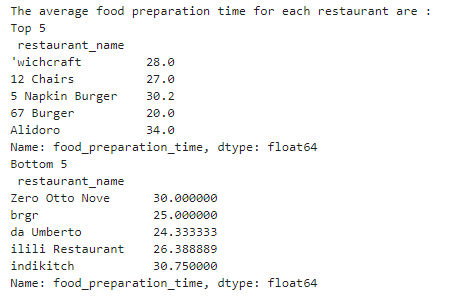
* The restaurant with the shortest average food preparation time id 67 Burger with average preparation time of 20.0
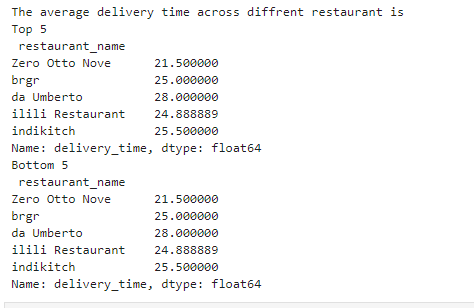
* The correlation coefficient of -0.04797741071835822 represents a very slight negative association (closed to negligible ) between cost_of_the_order and rating

#### 4.Demand Patterns
* How does the demand for different cuisine types vary on weekdays versus weekends?
* How does the average rating vary by cuisine type?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

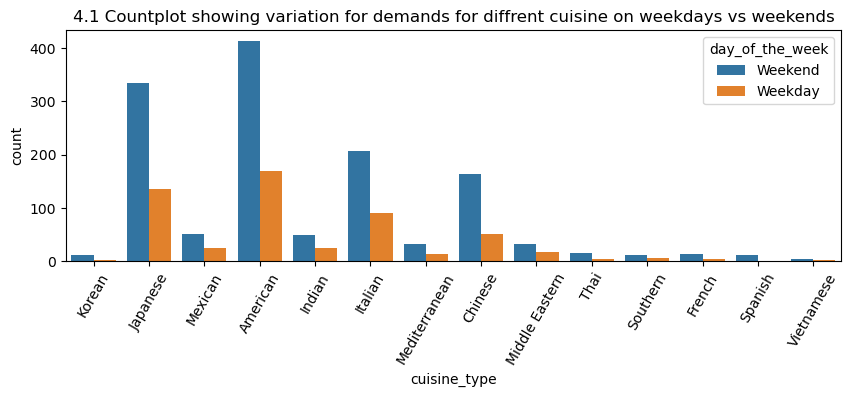

In [151]:
plt.figure(figsize=(10,3))
plt.title('4.1 Countplot showing variation for demands for diffrent cuisine on weekdays vs weekends')
sns.countplot(x='cuisine_type',hue='day_of_the_week',data=data)
plt.xticks(rotation=60)

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_16856\1978607660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cuisine_type']=df3['cuisine_type'].astype(str)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Indian'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Korean'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Mexican'),
  Text(9, 0, 'Middle Eastern'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'Spanish'),
  Text(12, 0, 'Thai'),
  Text(13, 0, 'Vietnamese'),
  Text(14, 0, 'nan')])

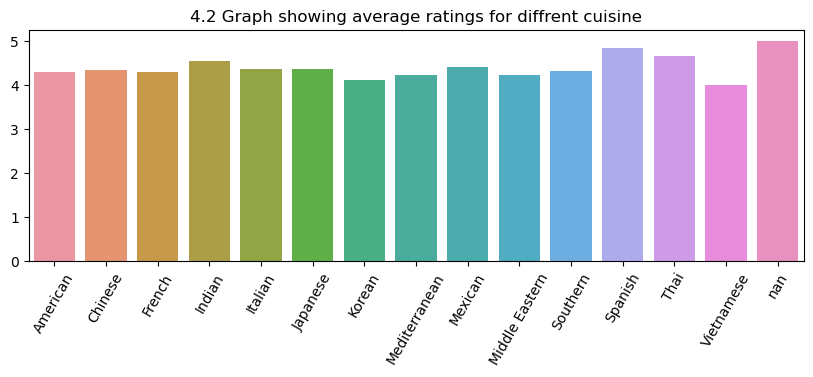

In [152]:
plt.figure(figsize=(10,3))
as1=np.array(df3.groupby('cuisine_type')['rating'].mean())
df3['cuisine_type']=df3['cuisine_type'].astype(str)
as2=np.array(sorted(df3['cuisine_type'].unique()))
plt.title('4.2 Graph showing average ratings for diffrent cuisine')
sns.barplot(x=as2,y=as1)
plt.xticks(rotation=60)

#### Answers of Demand patterns
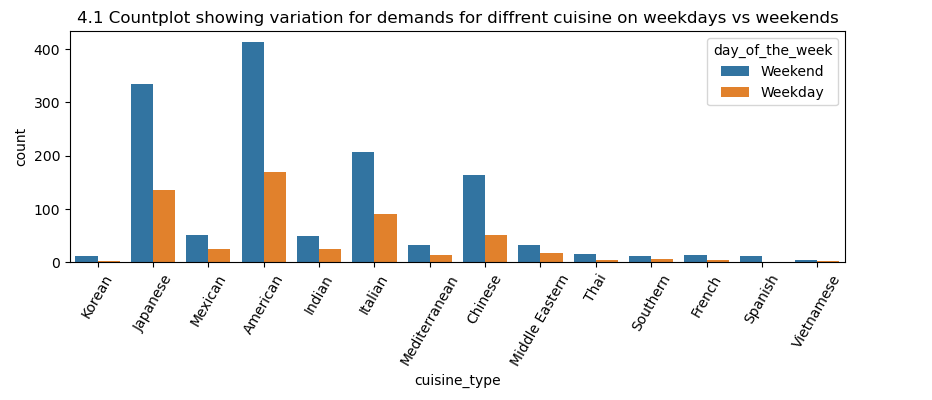
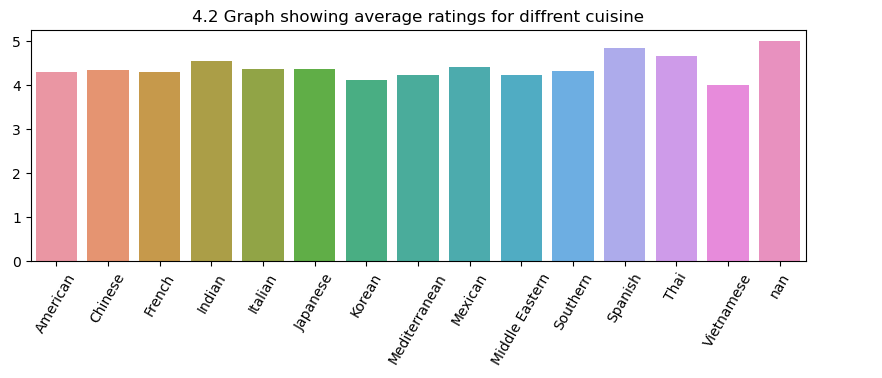


#### 5.Operational efficiency
* What is the average delivery time for all orders?
* Which restaurant has the longest average delivery time?
* Is there a relationship between food preparation time and delivery time?
* How does the delivery time impact customer ratings?

In [67]:
print("The average delivery time for all orders is ",data['delivery_time'].mean())

The average delivery time for all orders is  24.163329820864067


In [71]:
print("The restaurant with longest average delivery time of",data.groupby('restaurant_name')['delivery_time'].mean().max(),"is",data.groupby('restaurant_name')['delivery_time'].mean().idxmax())

The restaurant with longest average delivery time of 33.0 is Sarabeth's West


D:\Users\VIVEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\VIVEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


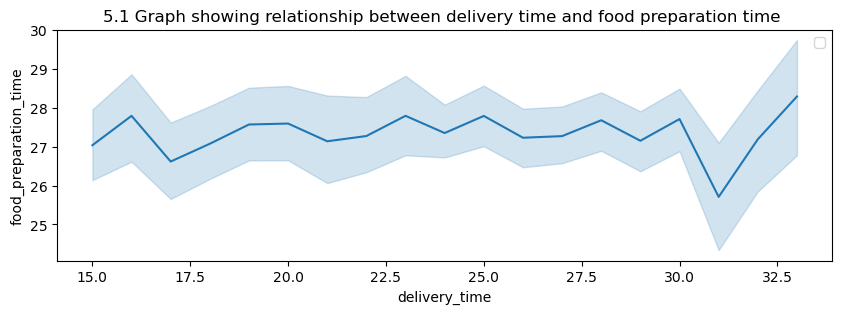

In [153]:
plt.figure(figsize=(10,3))
plt.title("5.1 Graph showing relationship between delivery time and food preparation time ")
sns.lineplot(x='delivery_time',y='food_preparation_time',data=data)
plt.legend(shadow=False)

In [88]:
print("The correlation coefficient is ",df3['delivery_time'].corr(df3['rating']))

The correlation coefficient is  -0.010120801797414725


#### Observations
* There is very low ( close to negligible ) negative relatiosnhip between delivery time and rating

#### Answers of Operational efficiency
* The average delivery time for all orders is  24.163329820864067
* The restaurant with longest average delivery time of 33.0 is Sarabeth's West
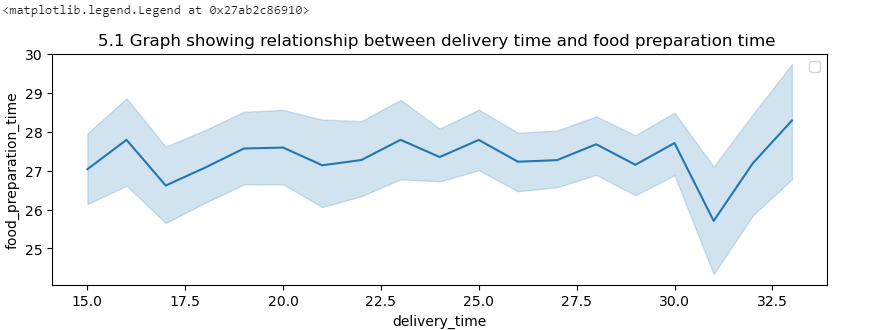
* The correlation coefficient is  -0.010120801797414725
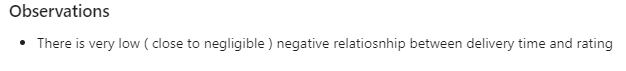



#### 6.Customer Insights
* What is the repeat order rate (number of customers who have placed more than one order)?
* What percentage of orders receive a rating of 4 or higher?

<Axes: title={'center': '6.1 Count plot showing the repeated oreder by customer id'}, xlabel='order_count', ylabel='count'>

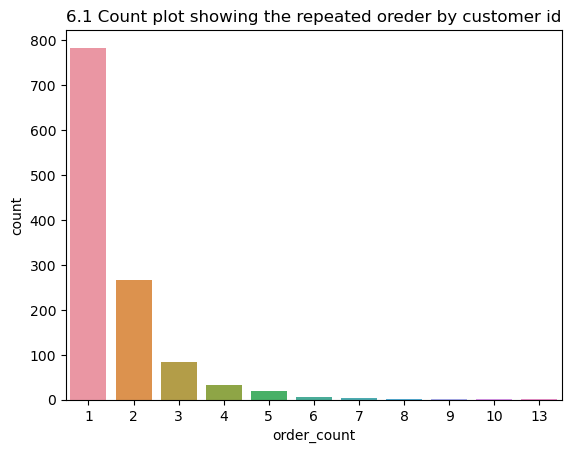

In [154]:
oc=data.groupby('customer_id').size().reset_index(name='order_count')
plt.title('6.1 Count plot showing the repeated oreder by customer id')
sns.countplot(data=oc,x='order_count')

#### Observations
* From the above graph the number of customers with repeated orders is 416 while total customers is 1200.Hence,repeated order rate is 416/1200*100 which is 34.67%

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Not given'), Text(1, 0, '5'), Text(2, 0, '3'), Text(3, 0, '4')])

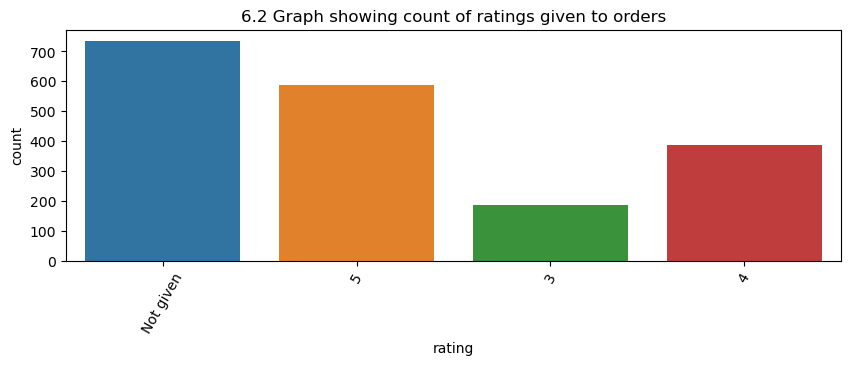

In [155]:
plt.figure(figsize=(10,3))
plt.title('6.2 Graph showing count of ratings given to orders')
sns.countplot(x='rating',data=data)
plt.xticks(rotation=60)

#### Observations
* The number of orders with rating of 4 or higher is 974 which is 974/1898*100 i.around 51.7%

#### Answers of Customer Heights
* Customers with repeated order rate is 34.67%
* The rate of orders with rating of 4 or higher is 51.7%

### Conclusion
#### The data analysis on the food aggregator company's orders provides valuable insights that can help improve customer experience and optimize business operations. Here are the key findings and recommendations based on the analysis:
* Identifying the most popular restaurants and cuisine types can help the company prioritize partnerships and promotional activities. The restaurants with the highest number of orders indicate customer preference and demand.
* Monitoring the cost trends over time, particularly across weekdays and weekends, can aid in dynamic pricing strategies to maximize revenue
* Weekends typically show higher order volumes, suggesting the need for increased operational capacity during these times.
* Examining the food preparation and delivery times helps identify bottlenecks in the order fulfillment process. Restaurants with long preparation times might need operational improvements.
#### By leveraging these insights and implementing the recommended strategies, the food aggregator company can enhance customer experience, improve operational efficiency, and ultimately drive business growth. Continuous monitoring and analysis of order data will be crucial to adapt to changing customer preferences and market conditions.